In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Part1: Dataset selection and initial Exploration

In [143]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [144]:
#Import dataset
df= pd.read_csv("/content/drive/MyDrive/AI and ML/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [145]:
#Dataset shape
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [146]:
df.shape

(1000, 8)

In [147]:
#Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [148]:
#First5rows
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [149]:
#last5rows
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [150]:
#combinefirst5$last5 rows
combined_df = pd.concat([df.head(5), df.tail(5)])
print(combined_df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90         

In [151]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


###Part2: Data Cleaning and Preprocessing

In [152]:
#Indentify missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [154]:
#Percentage of missing values per column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


In [155]:
#Remove rows/columns with excessive missing data
df = df.dropna()

In [156]:
#Fill with mean/median/mode
df['math score'].fillna(df['math score'].mean(), inplace=True)

/tmp/ipython-input-3036684200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(df['math score'].mean(), inplace=True)


In [157]:
#Use forward/backward fill for time series data
df.ffill()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


###Document your decisions and Rationale
1.
2.

###2.1 Duplicate Detection and Removal

In [158]:
#Check for duplicate rows
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [159]:
df.duplicated().sum()

np.int64(0)

In [160]:
#Indentify and remove duplicates
df.drop_duplicates(inplace=True)
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [161]:
#Report the number of duplicates found and removed
print("Number of duplicate rows found and removed:", df.duplicated().sum())

Number of duplicate rows found and removed: 0


###2.2 Outlier Detection and Treatment

In [162]:
#Use Z-score method (values beyond -3, +3 standard deviations)
df = df[(np.abs(df['math score'] - df['math score'].mean()) / df['math score'].std()) < 3]


In [163]:
df = df[(np.abs(df['reading score'] - df['reading score'].mean()) / df['reading score'].std()) < 3]

In [164]:
df = df[(np.abs(df['writing score'] - df['writing score'].mean()) / df['writing score'].std()) < 3]

In [165]:
#Use IQR method
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1

In [166]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)
IQR = Q3 - Q1

In [167]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)
IQR = Q3 - Q1

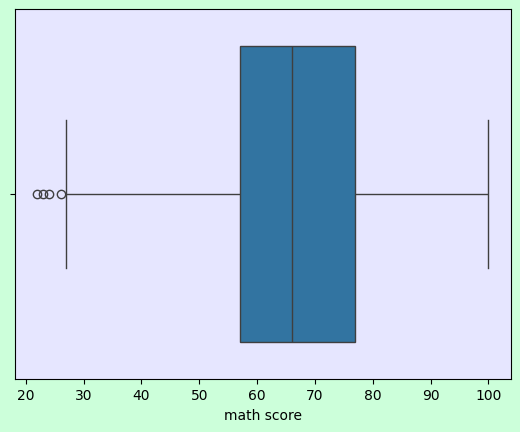

In [168]:
#Create boxplot Visualizations to indentify outliers
sns.boxplot(x=df['math score'])
plt.show()

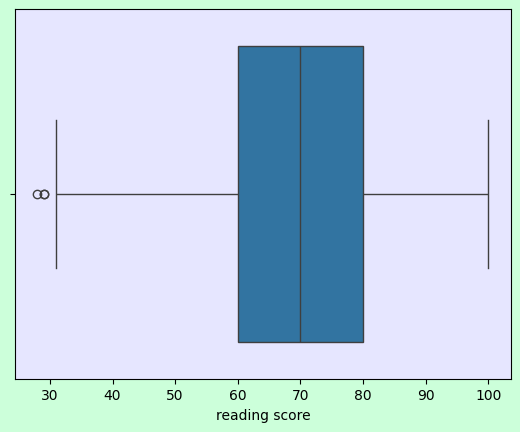

In [169]:
sns.boxplot(x=df['reading score'])
plt.show()

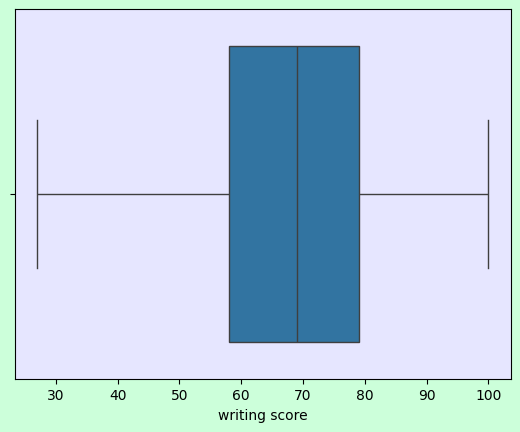

In [170]:
sns.boxplot(x=df['writing score'])
plt.show()

/tmp/ipython-input-2216502553.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([subject_data['math score'], subject_data['reading score'], subject_data['writing score']],


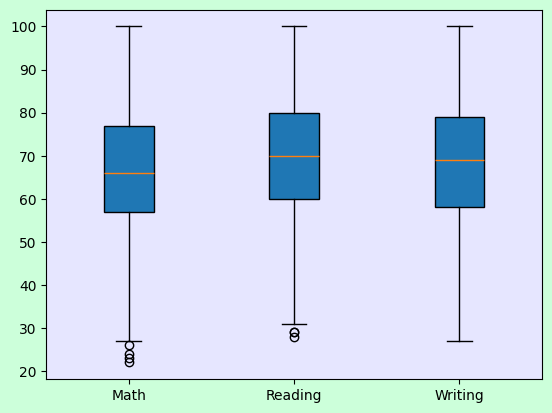

In [171]:
#Boxplot for 3 subjects
subject_data  = df[['math score','reading score', 'writing score']]
plt.boxplot([subject_data['math score'], subject_data['reading score'], subject_data['writing score']],
            labels=['Math', 'Reading', 'Writing'],patch_artist = True)
plt.show()

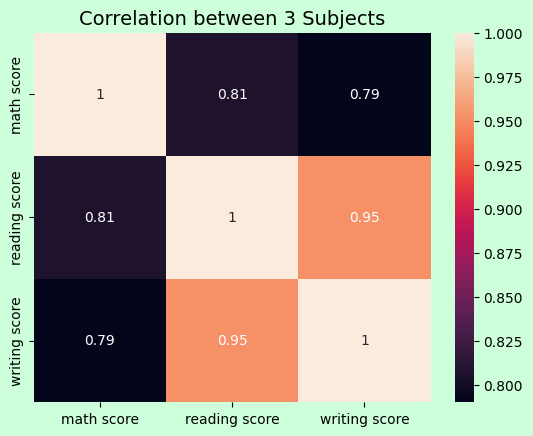

In [172]:
corr = df[['math score','reading score','writing score']].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation between 3 Subjects', fontsize=14,)
plt.show()

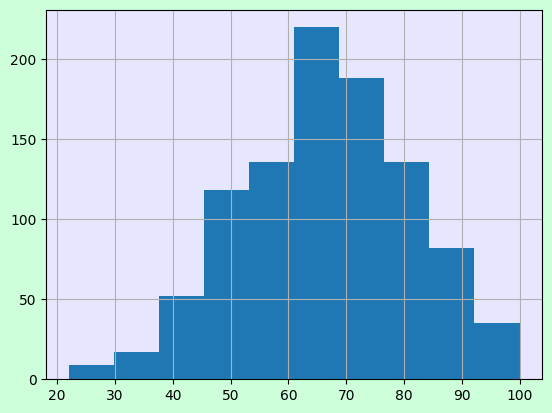

In [173]:
#Create histograms Visualizations to indentify outliers
df['math score'].hist()
plt.show()

###Part3: Data Analysis using core pandas methods

In [174]:
# Which subject has the highest average score
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,64.040856,72.957198,72.850195
male,68.974948,65.730689,63.590814


In [175]:
#Sort by subject scores in ascending order
df.sort_values(by='reading score')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
211,male,group C,some college,free/reduced,none,35,28,27
601,female,group C,high school,standard,none,29,29,30
896,male,group B,high school,free/reduced,none,36,29,27
810,male,group A,some high school,standard,none,51,31,36
466,female,group D,associate's degree,free/reduced,none,26,31,38
...,...,...,...,...,...,...,...,...
149,male,group E,associate's degree,free/reduced,completed,100,100,93
179,female,group D,some high school,standard,completed,97,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
106,female,group D,master's degree,standard,none,87,100,100


In [176]:
#Select rows where 'math score' is greater than 80
df.query('`math score` > 80')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82
35,male,group E,associate's degree,standard,completed,81,81,79
...,...,...,...,...,...,...,...,...
979,female,group C,associate's degree,standard,none,91,95,94
981,male,group D,some high school,standard,none,81,78,78
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75


In [177]:
df.value_counts()

gender  race/ethnicity  parental level of education  lunch         test preparation course  math score  reading score  writing score
male    group E         some high school             standard      none                     94          88             78               1
                        some college                 standard      none                     76          67             67               1
                                                                                            69          60             54               1
                                                                                            68          72             65               1
                                                                                                        60             59               1
                                                                                                                                       ..
female  group A         associate's degree           standard      none                     82          93             93               1
                                                                   completed                65          70             74               1
                                                                                            55          65             62               1
                                                     free/reduced  none                     65          85             76               1
                                                                                            41          51             48               1
Name: count, Length: 993, dtype: int64

In [178]:
#average writing score for each combination of gender and racial/ethnic group
df.pivot_table(index='gender', columns='race/ethnicity', values='writing score', aggfunc='mean')

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,67.861111,71.306931,72.122905,75.023256,75.536232
male,59.923077,60.752941,62.712230,65.413534,68.042857


In [179]:
#Create a cross-tabulation of gender and race/ethnicity
pd.crosstab(df['gender'], df['race/ethnicity'])

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,36,101,179,129,69
male,52,85,139,133,70


In [180]:
print("Average math score is    : {}".format(np.mean(df['math score'])))
print("Average reading score is : {}".format(np.mean(df['reading score'])))
print("Average writing score is : {}".format(np.mean(df['writing score'])))


Average math score is    : 66.42094662638469
Average reading score is : 69.47129909365559
Average writing score is : 68.38368580060423


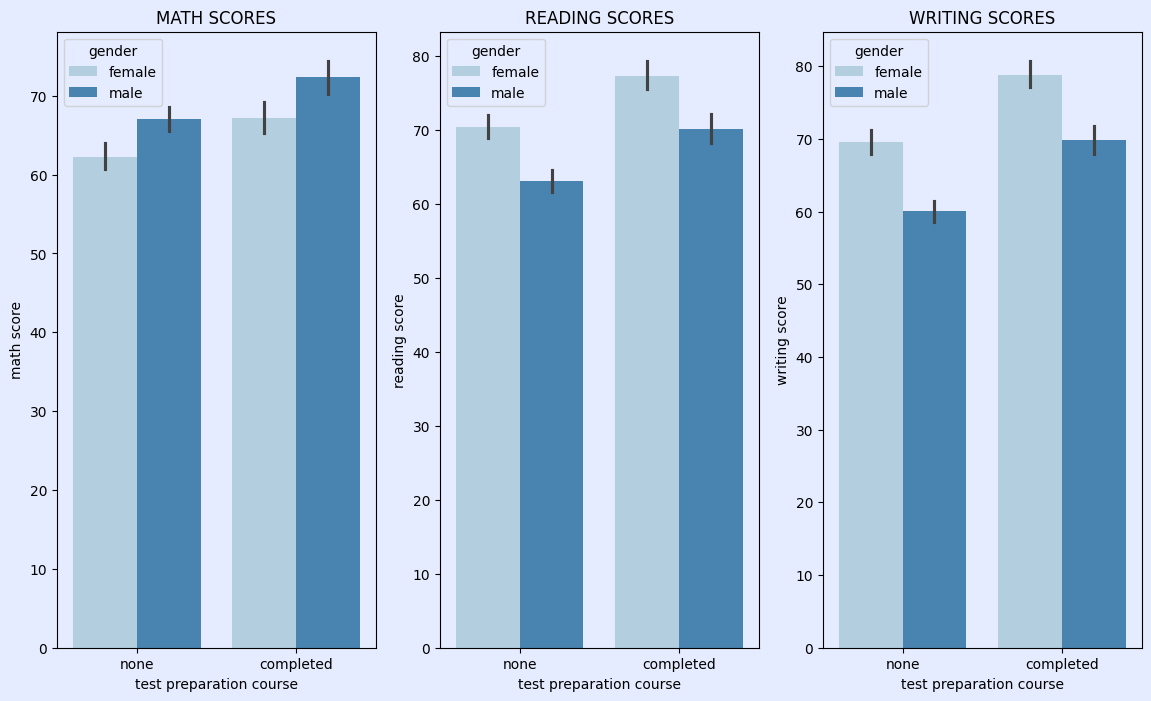

In [181]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',palette='Blues',linewidth=0)
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',palette='Blues',linewidth=0)
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',palette='Blues',linewidth=0)
plt.title('WRITING SCORES')
plt.show()

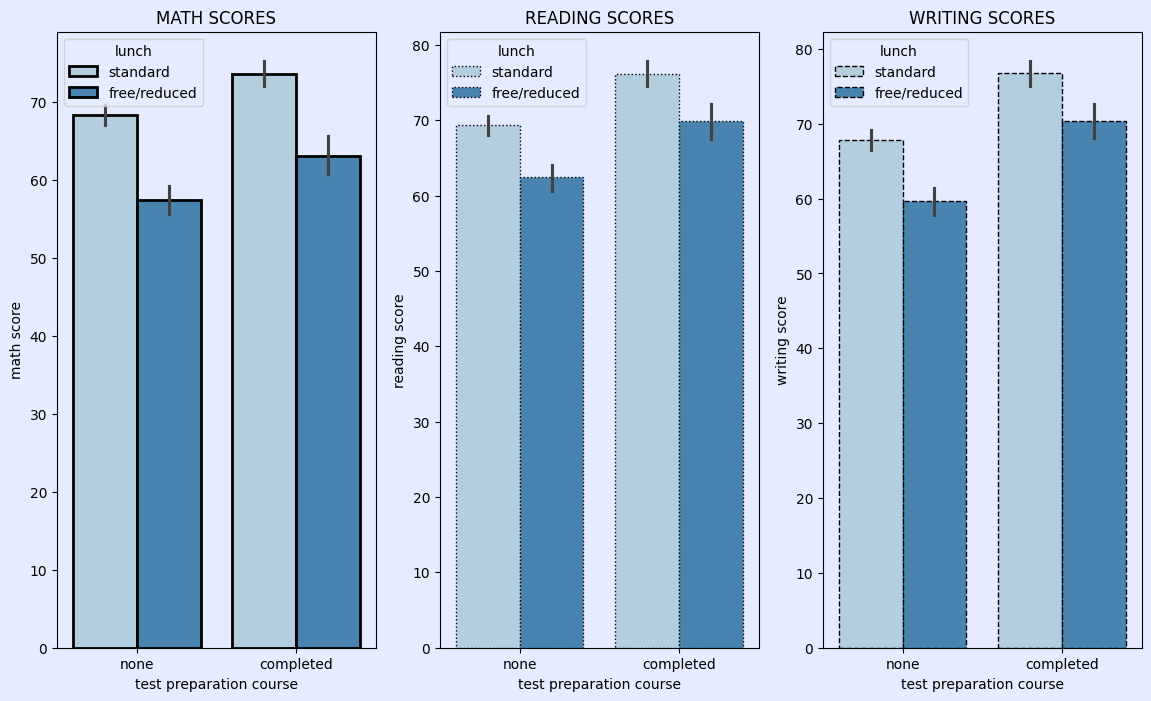

In [182]:
#g
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='lunch',palette='Blues',edgecolor='black',linewidth=2)
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='lunch',palette='Blues',edgecolor='black',linestyle=':')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='lunch',palette='Blues',edgecolor='black',linestyle='--')
plt.title('WRITING SCORES')
plt.show()

###Part4: Exploratory Data Analysis

Text(0.5, 1.0, 'MATH SCORES')

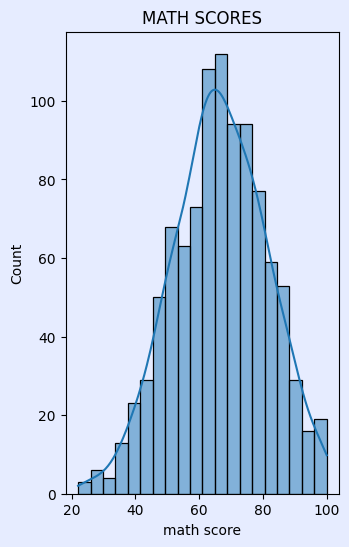

In [183]:
#Analyze distribution of individual variables
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True)
plt.title('MATH SCORES')

Text(0.5, 1.0, 'READING SCORES')

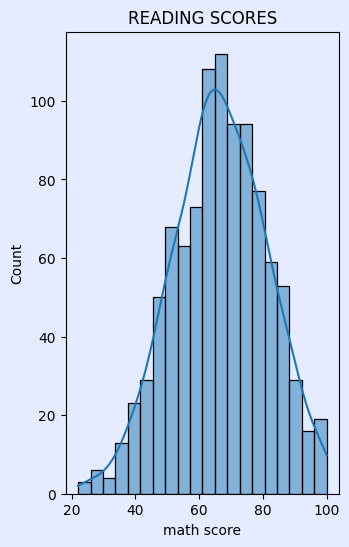

In [184]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True)
plt.title('READING SCORES')

Text(0.5, 1.0, 'WRITING SCORES')

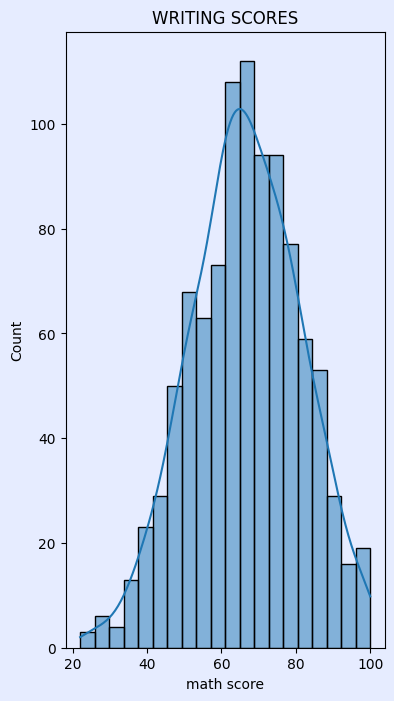

In [185]:
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True)
plt.title('WRITING SCORES')

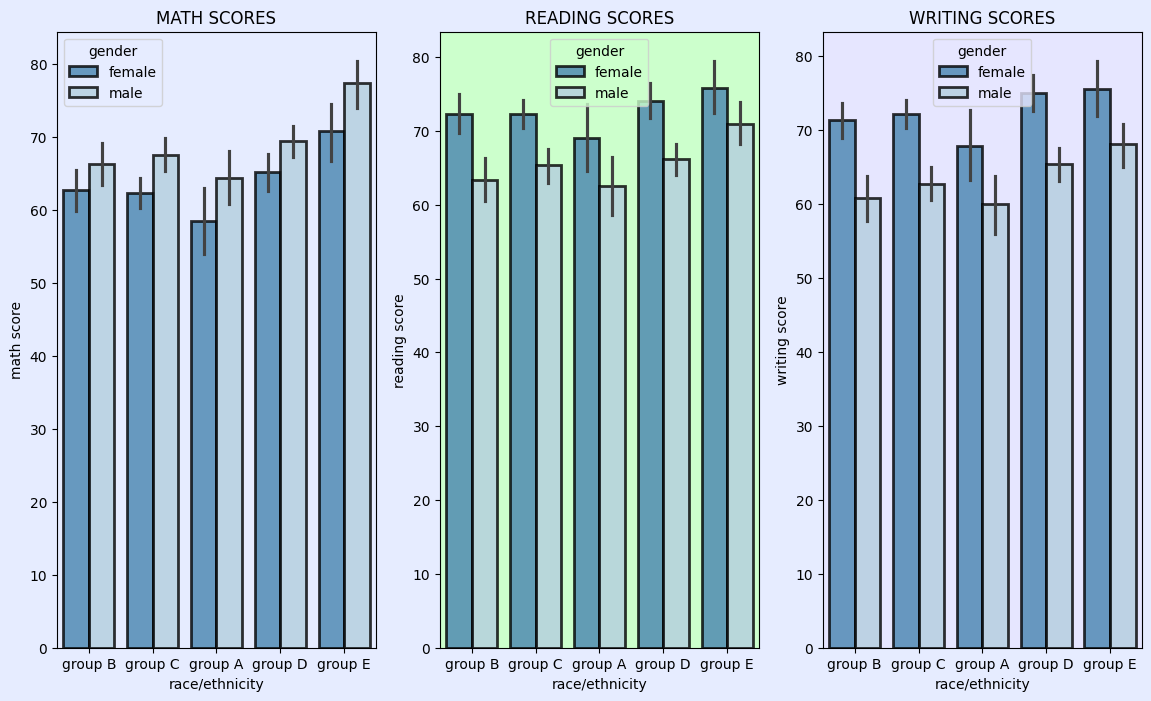

In [186]:
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='Blues_r',edgecolor='black',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#ccffcc"
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='Blues_r',edgecolor='black',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#e6e6ff"
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='Blues_r',edgecolor='black',**{'alpha':0.8,'linewidth':2})
plt.show()